In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")



In [53]:
#Reading data file
df = pd.read_csv('/content/heart (1).csv')

In [54]:
#Checking head of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 1. Preliminary analysis:
 1. Perform preliminary data inspection and report the findings as     the structure of the data, missing values, duplicates, etc.

In [55]:
df.shape

(303, 14)

In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [57]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [58]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [59]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
 df.duplicated().sum()

1

2. Removing duplicates (if any) and treating missing values using an appropriate strategy.

In [61]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

3. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [62]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [63]:
#Checking data head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
df.sex.value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [65]:
#grouping and cutting to segment and sort data values into bin
df.groupby([pd.cut(df['age'],5)])['target'].mean()

age
(28.952, 38.6]    0.727273
(38.6, 48.2]      0.704225
(48.2, 57.8]      0.577320
(57.8, 67.4]      0.377358
(67.4, 77.0]      0.588235
Name: target, dtype: float64

In [66]:
df.groupby([pd.cut(df['trestbps'],5)])['target'].mean()

trestbps
(93.894, 115.2]    0.615385
(115.2, 136.4]     0.560284
(136.4, 157.6]     0.530120
(157.6, 178.8]     0.380952
(178.8, 200.0]     0.200000
Name: target, dtype: float64

#### People having higher resting blood pressure have lower chance of heart disease as per the data

In [67]:
#Checking composition for both genders
df.sex.value_counts(normalize=True)*100

sex
1    68.211921
0    31.788079
Name: proportion, dtype: float64

### Performing EDA and Modeling:
1. Describe the relationship between cholesterol levels and our target variable.
2. What can be concluded about the relationship between peak exercising and occurrence of heart attack?
3. Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?
4. Use a pair plot to understand the relationship between all the given variables.
5. Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [68]:
# Using correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Text(0.5, 1.0, 'Correlation between variables')

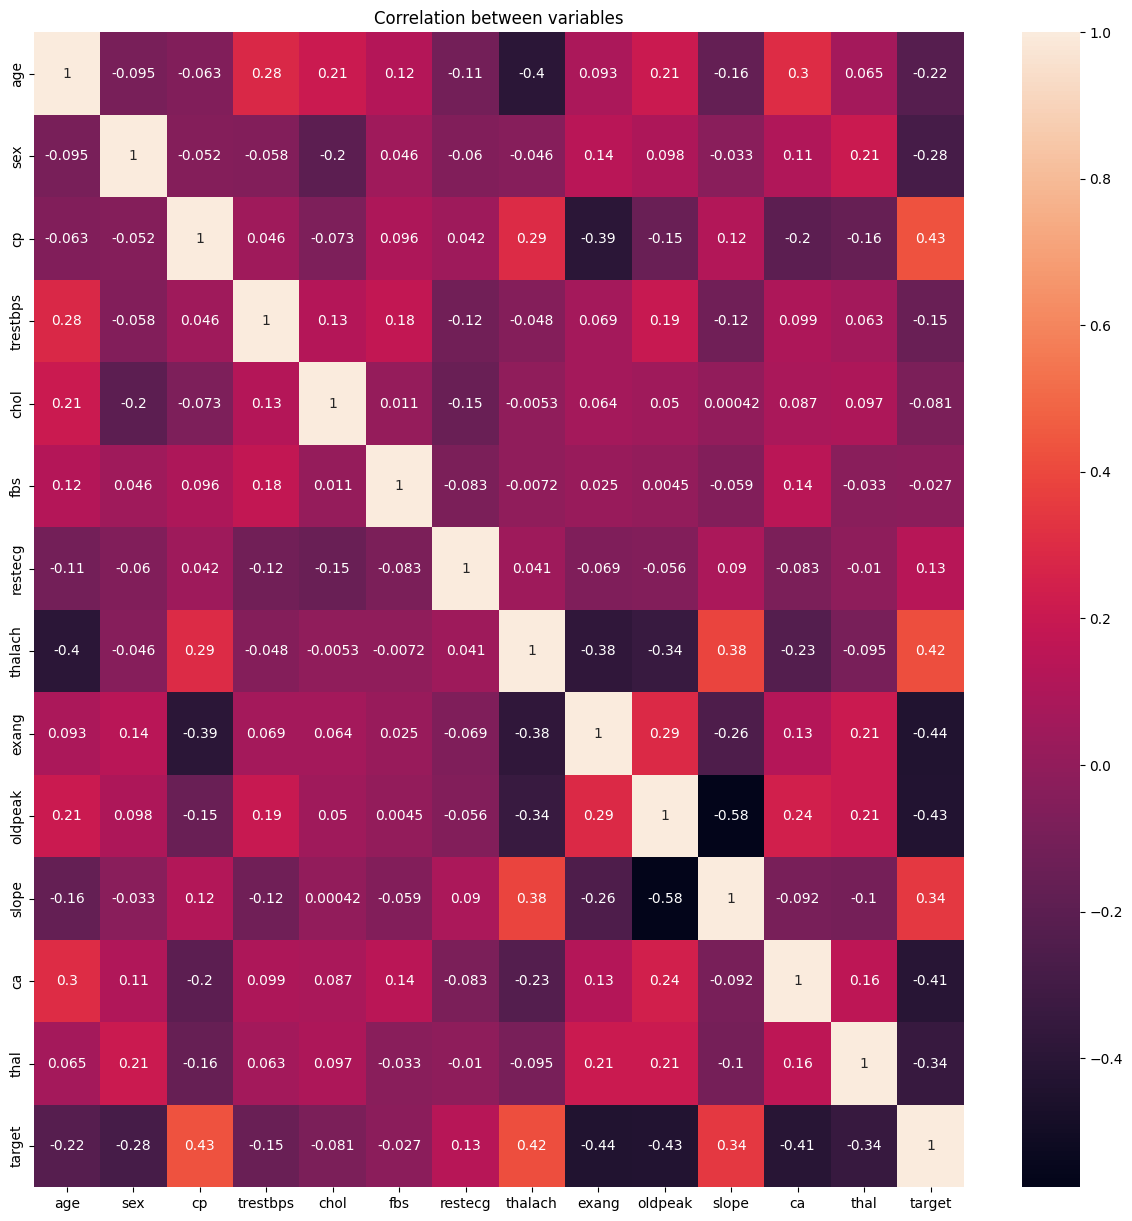

In [69]:
plt.rcParams['figure.figsize']=(15,15)
sns.heatmap(df.corr(),annot= True)
plt.title("Correlation between variables")

In [70]:
df.groupby([pd.cut(df['chol'],5)])['target'].mean()

chol
(125.562, 213.6]    0.607143
(213.6, 301.2]      0.514286
(301.2, 388.8]      0.526316
(388.8, 476.4]      0.500000
(476.4, 564.0]      1.000000
Name: target, dtype: float64

#### Showing positive correlation for cholesterol levels and our target variable.

In [71]:
df.groupby(['slope'])['target'].mean()

slope
0    0.428571
1    0.350000
2    0.751773
Name: target, dtype: float64

#### When slope is higher chances of Cardiovascular diseases(CVD) is also higher

In [72]:
df.groupby([pd.cut(df['thalach'],5)])['target'].mean()

thalach
(70.869, 97.2]    0.142857
(97.2, 123.4]     0.297297
(123.4, 149.6]    0.352273
(149.6, 175.8]    0.676259
(175.8, 202.0]    0.870968
Name: target, dtype: float64

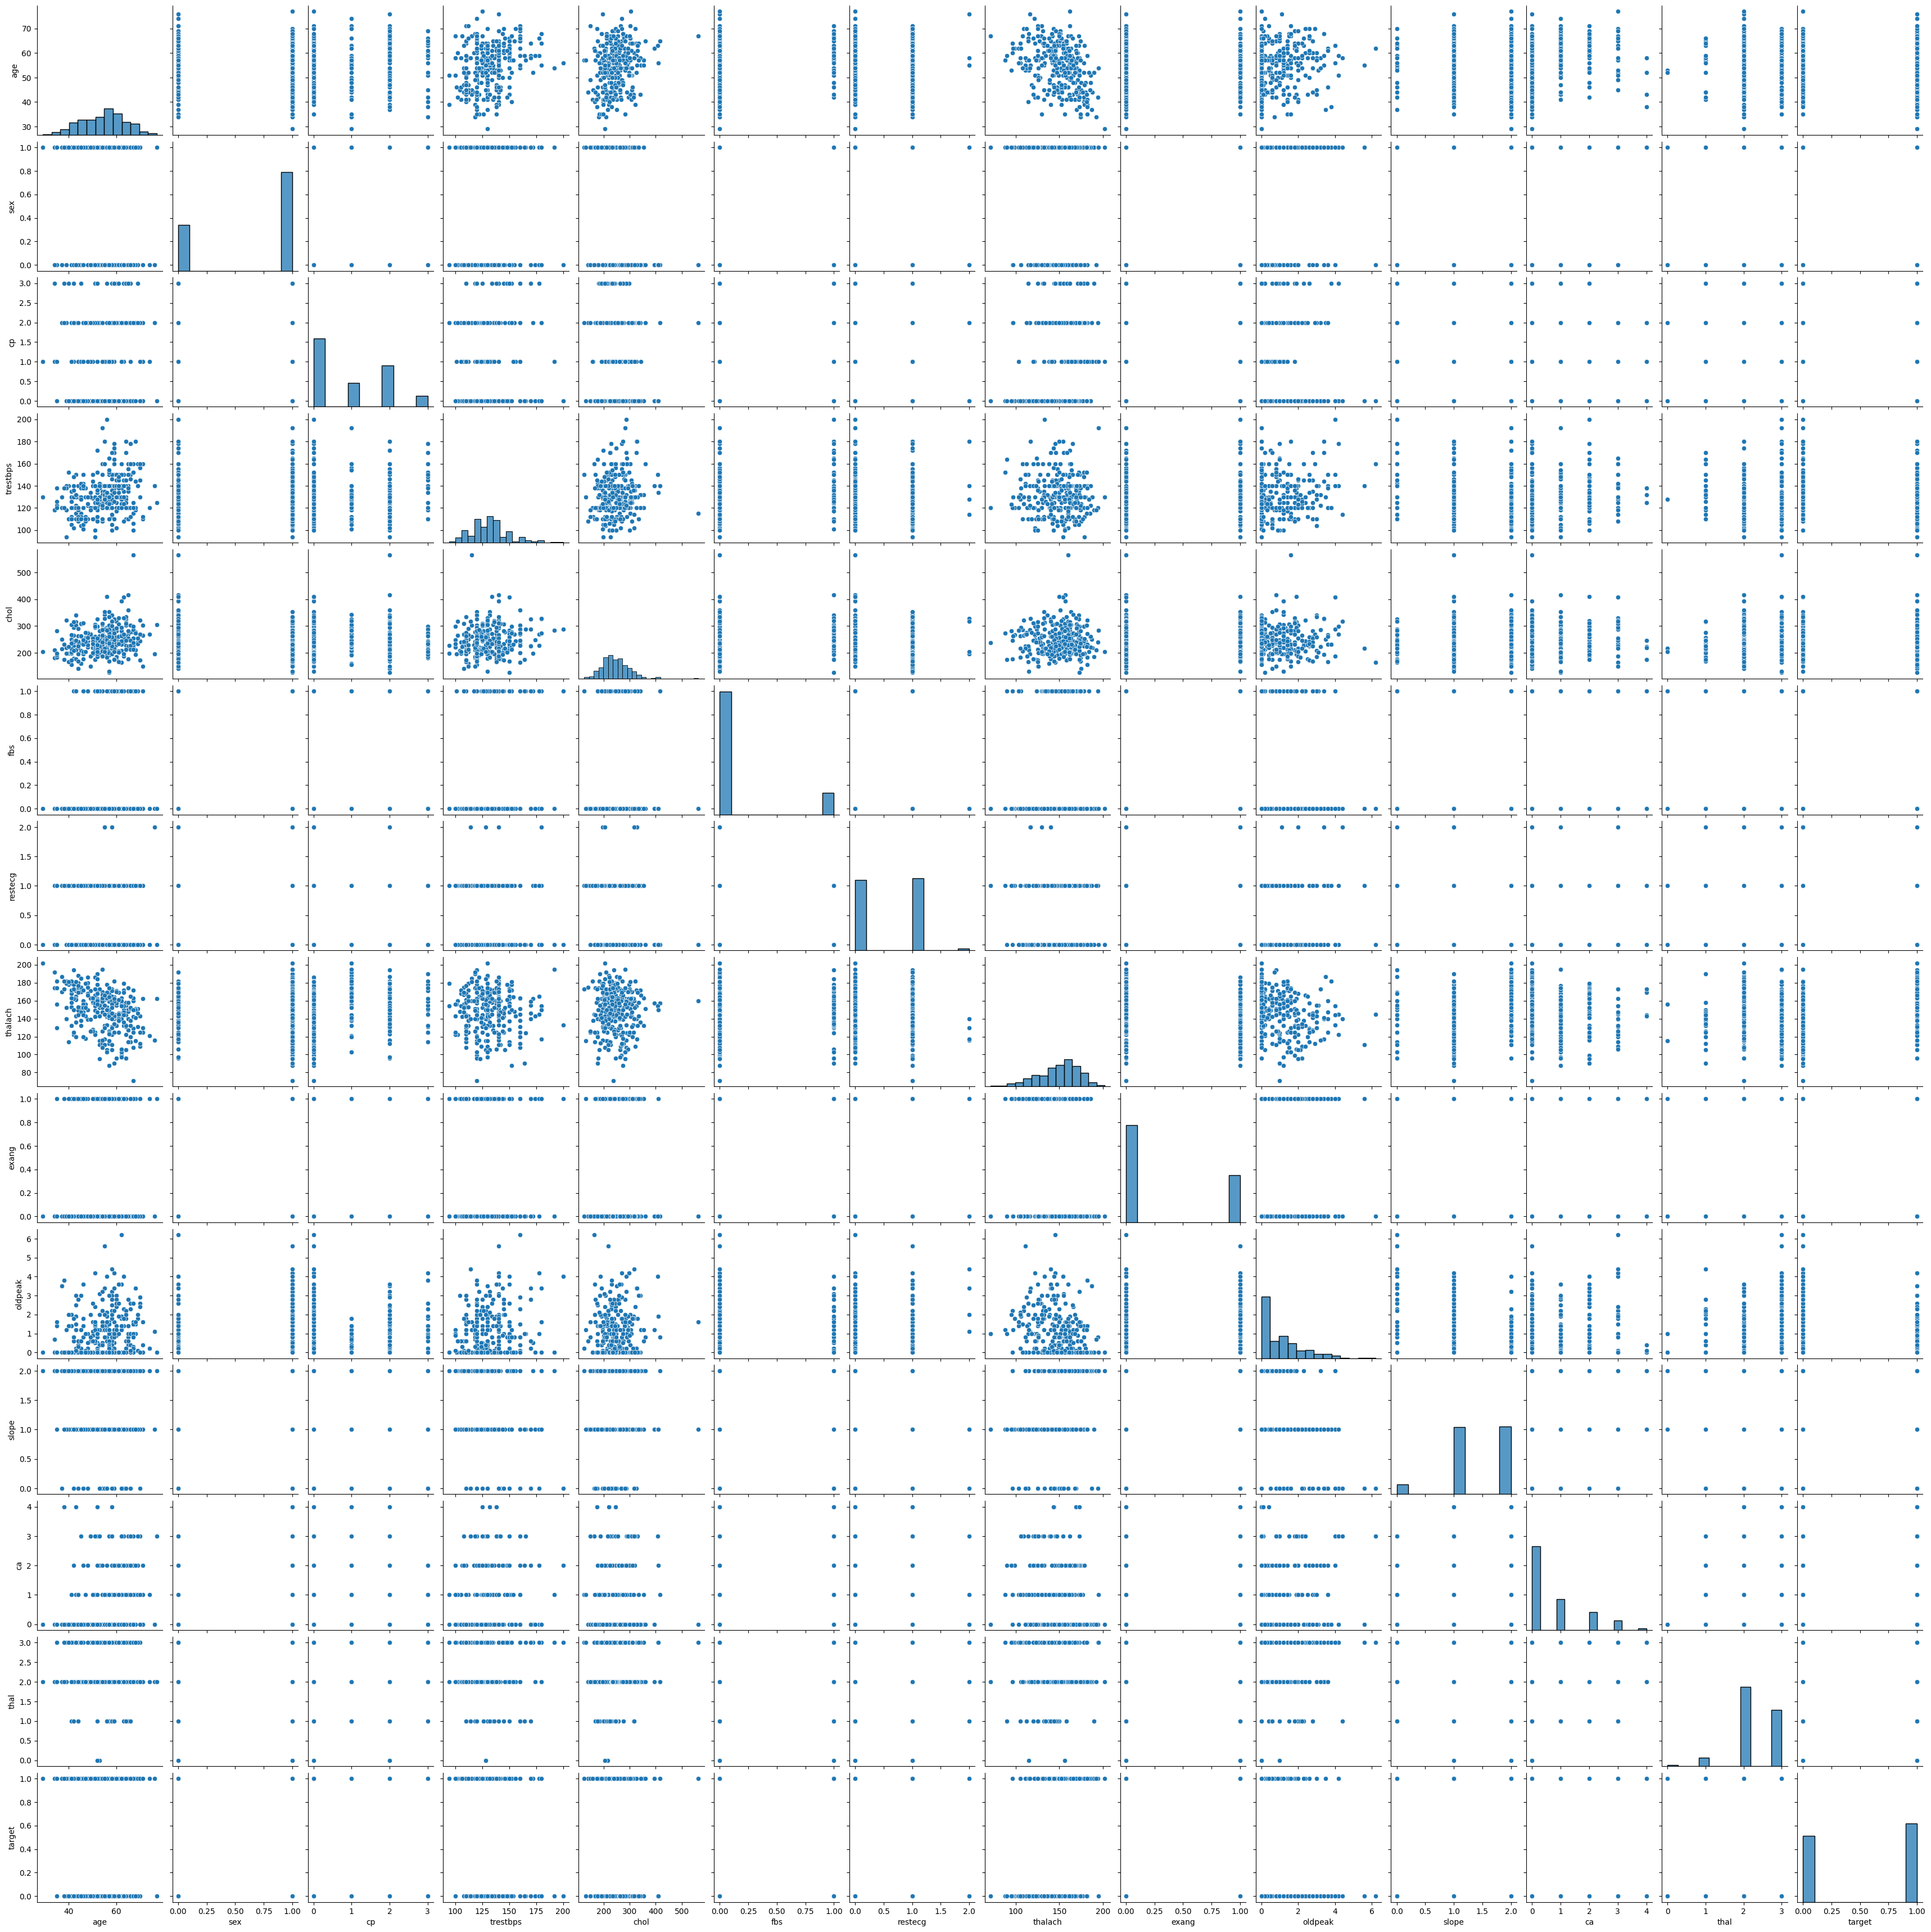

In [73]:
#Using pairplot from seaborn library
sns.pairplot(df)

In [74]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=20)

In [75]:
display(df_train.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


In [76]:
display(df_test.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


In [77]:
display(df_train.shape)
display(df_test.shape)

(241, 14)

(61, 14)

In [78]:
X_train = df.drop("target", axis=1)
y_train = df.target

In [79]:
X_test = df_test
y_test = df_test.pop("target")

In [80]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(302, 13)

(302,)

(61, 13)

(61,)

In [81]:
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)
print(X_train.columns)

[0.04057647]
[[ 0.01506139 -1.27543647  0.80631461 -0.01731326 -0.0032811  -0.05646545
   0.50560516  0.03181951 -0.76487937 -0.50269504  0.50857475 -0.75571108
  -0.88366752]]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [110]:
model.predict_proba(X_test)

array([[0.99814154, 0.00185846],
       [0.20199201, 0.79800799],
       [0.69950183, 0.30049817],
       [0.17945605, 0.82054395],
       [0.13339526, 0.86660474],
       [0.0319784 , 0.9680216 ],
       [0.44422554, 0.55577446],
       [0.94585344, 0.05414656],
       [0.9806566 , 0.0193434 ],
       [0.1123618 , 0.8876382 ],
       [0.99321308, 0.00678692],
       [0.97317604, 0.02682396],
       [0.00679574, 0.99320426],
       [0.38223489, 0.61776511],
       [0.94588856, 0.05411144],
       [0.2113388 , 0.7886612 ],
       [0.9659409 , 0.0340591 ],
       [0.10252282, 0.89747718],
       [0.23831135, 0.76168865],
       [0.06312861, 0.93687139],
       [0.37998228, 0.62001772],
       [0.51316871, 0.48683129],
       [0.99544547, 0.00455453],
       [0.15687414, 0.84312586],
       [0.0337557 , 0.9662443 ],
       [0.91101942, 0.08898058],
       [0.10552782, 0.89447218],
       [0.94738921, 0.05261079],
       [0.46254059, 0.53745941],
       [0.18000611, 0.81999389],
       [0.

In [82]:
y_pred= model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [83]:
accuracy= accuracy_score(y_test,y_pred)
print ("Logistic testing accuracy is ", round(accuracy,2) * 100, "%")

Logistic testing accuracy is  90.0 %


#### Accuracy of the model is very high which means it is predicting the data very well.

In [84]:
#Validating the results by using the confusion matrix and classification␣ 􏰀→report(Providing better understanding of the results)
confusion_matrix(y_test,y_pred)

array([[20,  3],
       [ 3, 35]])

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.92      0.92      0.92        38

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



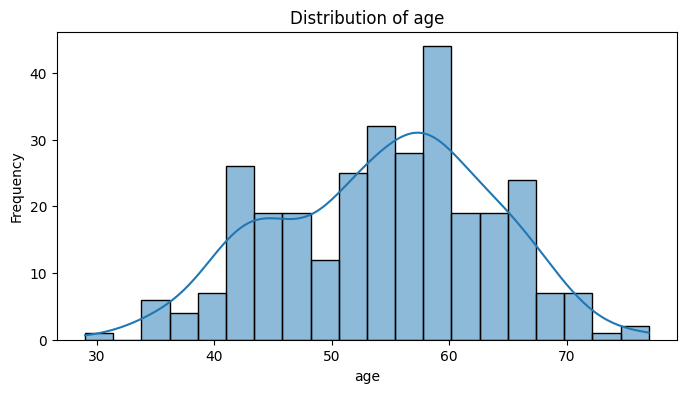

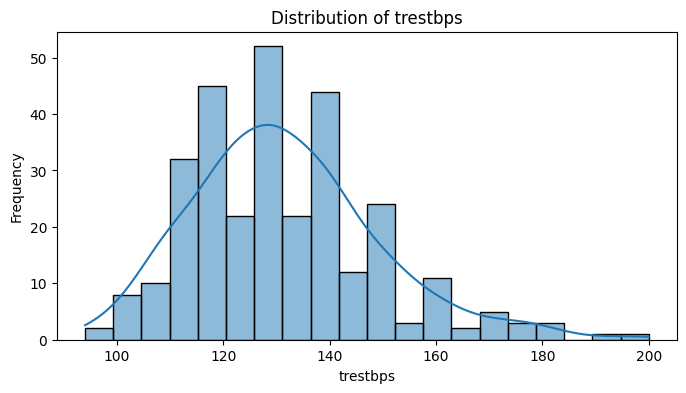

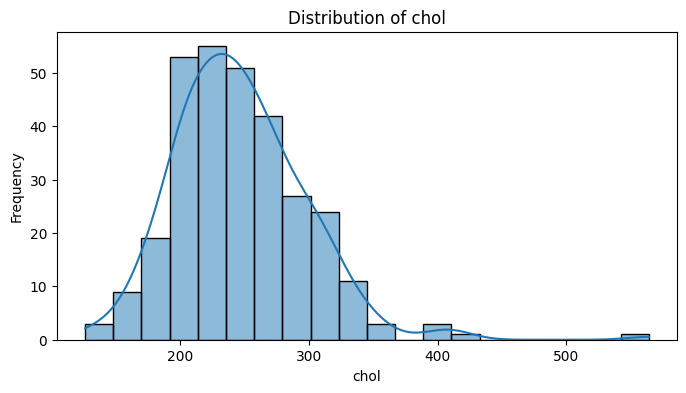

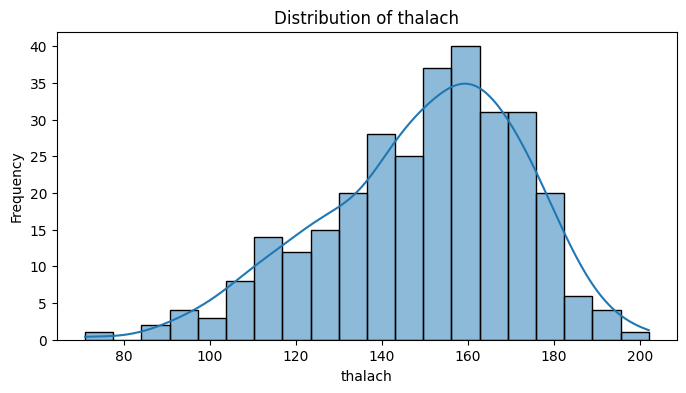

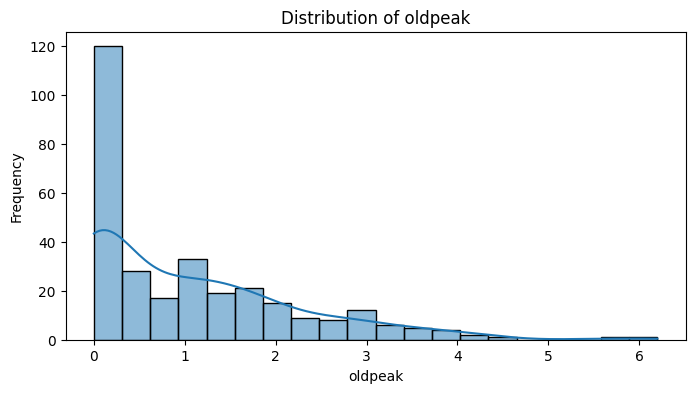

In [86]:
# Univariate Analysis - Numerical Variables
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=var, kde=True, bins=20)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


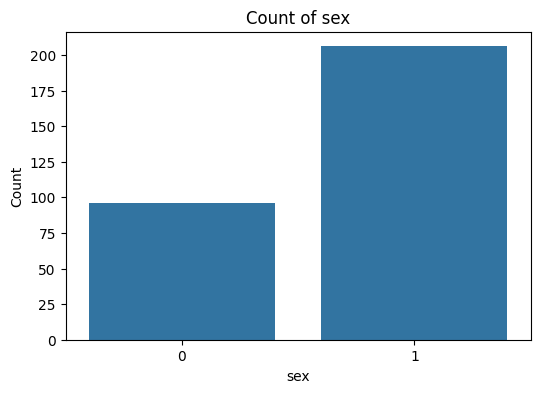

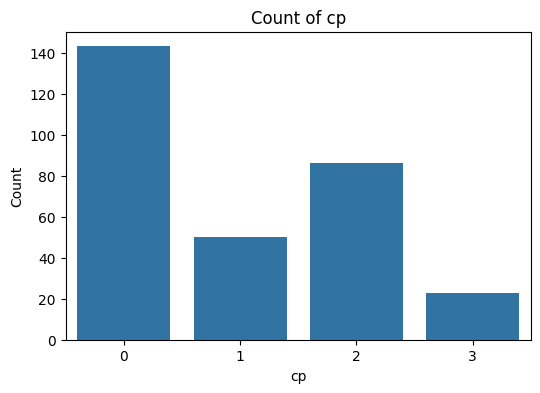

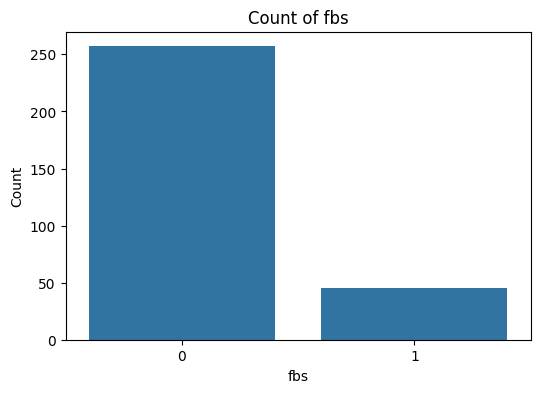

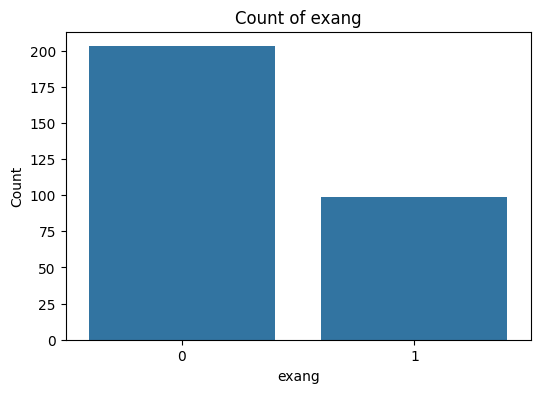

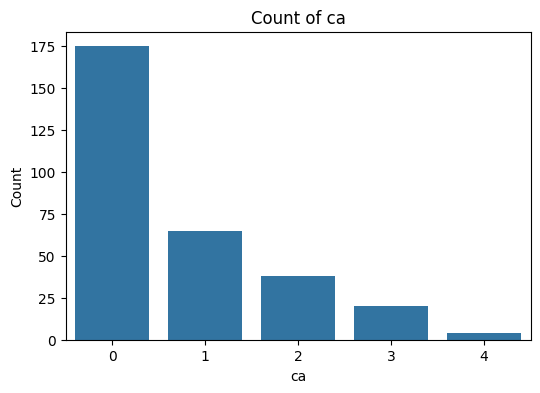

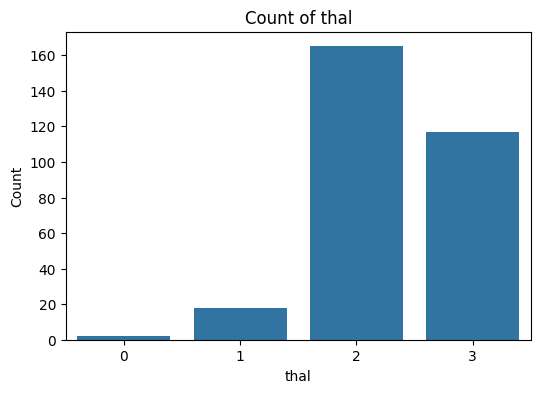

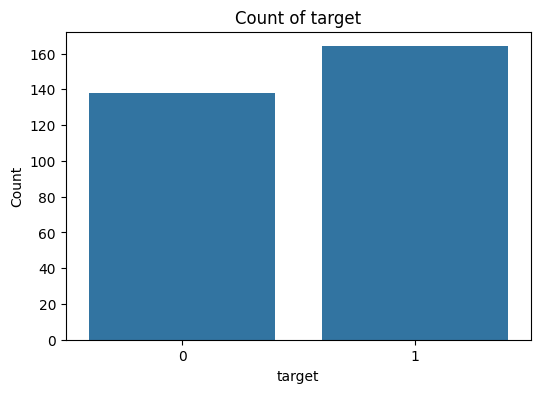

In [87]:
# Univariate Analysis - Categorical Variables
categorical_vars = ['sex', 'cp', 'fbs', 'exang', 'ca', 'thal', 'target']
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

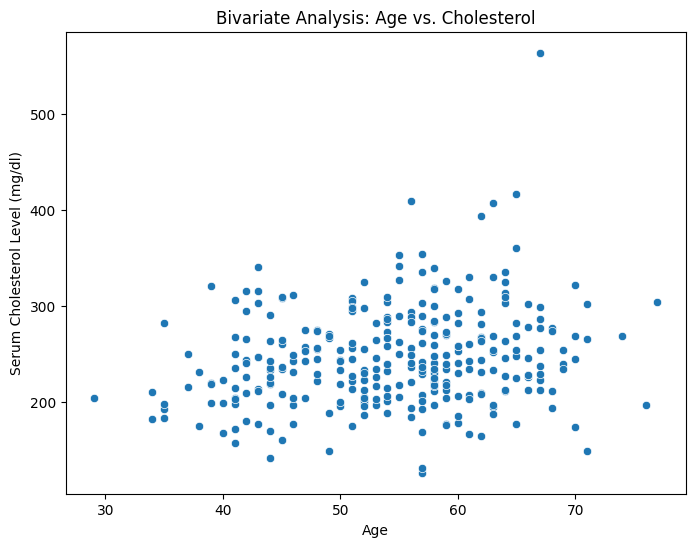

In [90]:
# Scatter Plot (Bivariate Analysis: Age vs. Cholesterol)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='chol')
plt.title('Bivariate Analysis: Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Serum Cholesterol Level (mg/dl)')
plt.show()


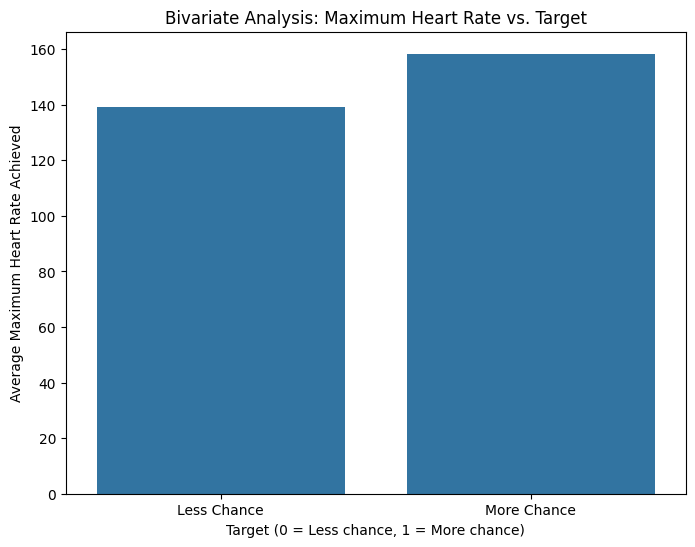

In [95]:
# Grouped Bar Chart (Bivariate Analysis: Maximum Heart Rate vs. Target)
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='target', y='thalach', ci=None)
plt.title('Bivariate Analysis: Maximum Heart Rate vs. Target')
plt.xlabel('Target (0 = Less chance, 1 = More chance)')
plt.ylabel('Average Maximum Heart Rate Achieved')
plt.xticks([0, 1], ['Less Chance', 'More Chance'])
plt.show()

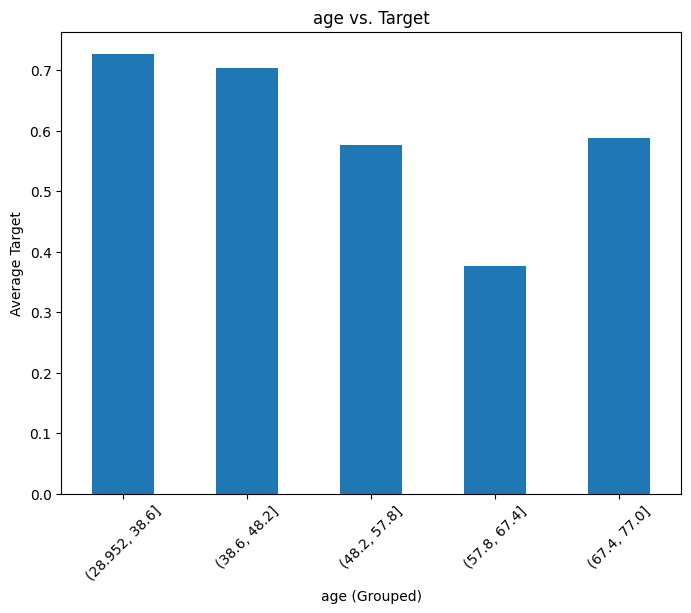

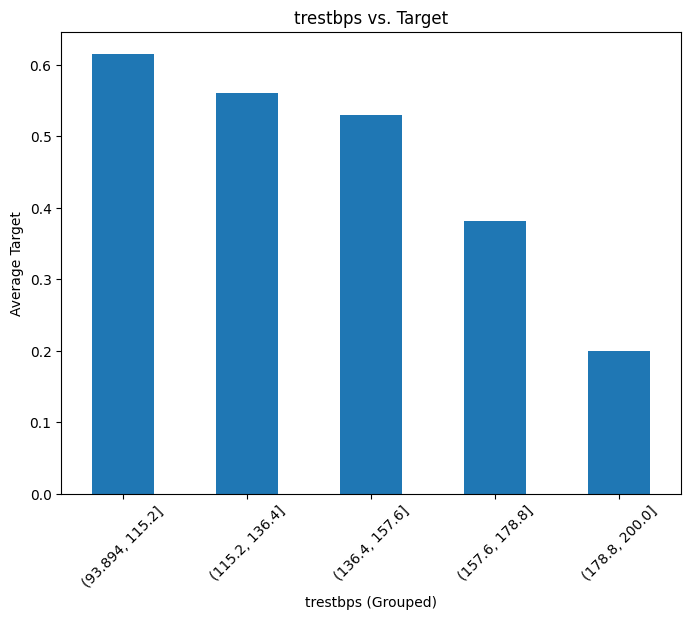

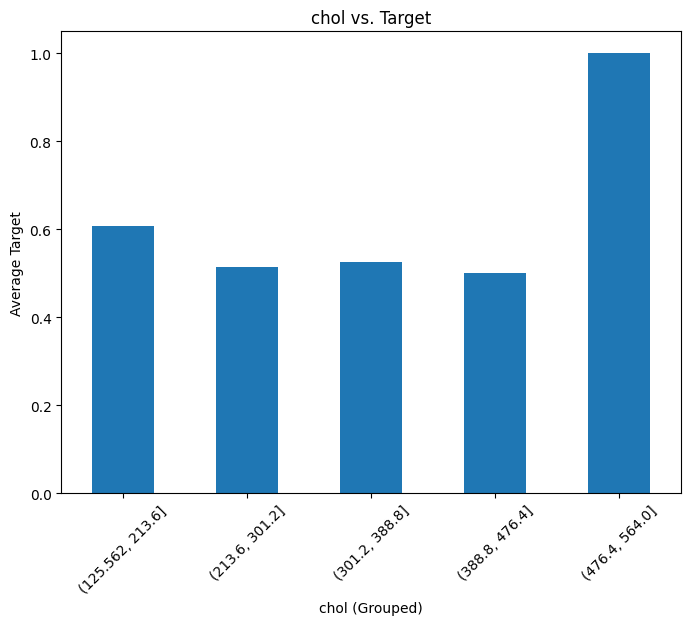

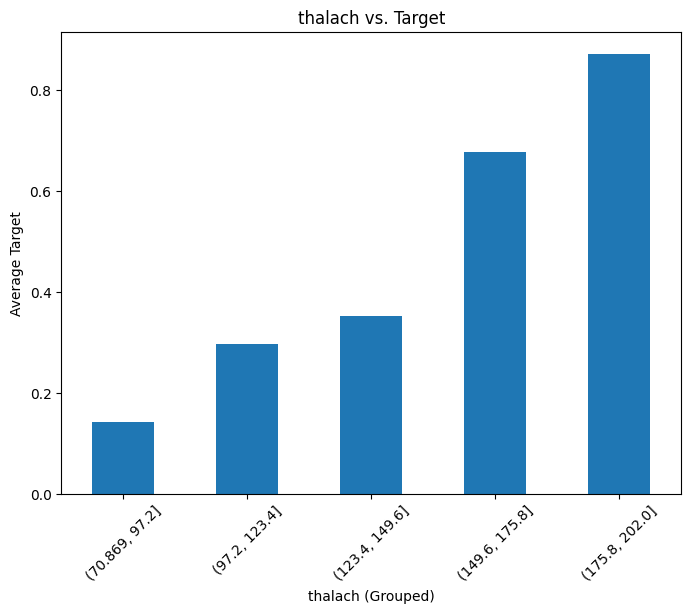

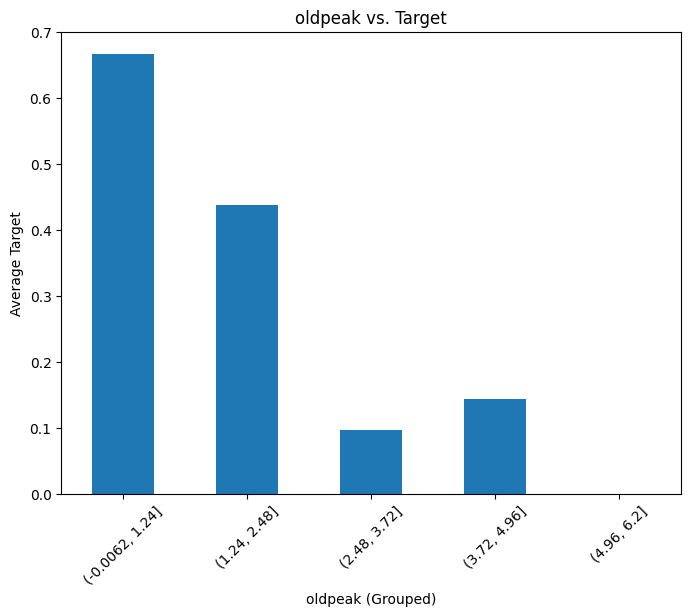

In [107]:
# Define the number of bins for grouping
num_bins = 5

# Grouped Bar Plots (Numerical vs. Target)
for var in numerical_vars:
    # Discretize the numerical variable into bins
    df[f'{var}_bin'] = pd.cut(df[var], bins=num_bins)

    # Calculate the average target value for each bin
    avg_target_by_bin = df.groupby(f'{var}_bin')['target'].mean()

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    avg_target_by_bin.plot(kind='bar')
    plt.title(f'{var} vs. Target')
    plt.xlabel(f'{var} (Grouped)')
    plt.ylabel('Average Target')
    plt.xticks(rotation=45)
    plt.show()

    # Drop the temporary bin column
    df.drop(columns=[f'{var}_bin'], inplace=True)
